# Workbook 6: Panel analysis
This week we will be reviewing panel analysis. The discussion on panel analysis are from Multilevel and Longitudinal Modeling Using Stata by Sophia Rabe-Hesketh and Anders Skrondal. The discussion on panel analysis is also from Fixed Effects Models and Fixed Effects Models Using Categorical Outcomes, both written by Paul Allison.

# Panel analysis: examining units over time

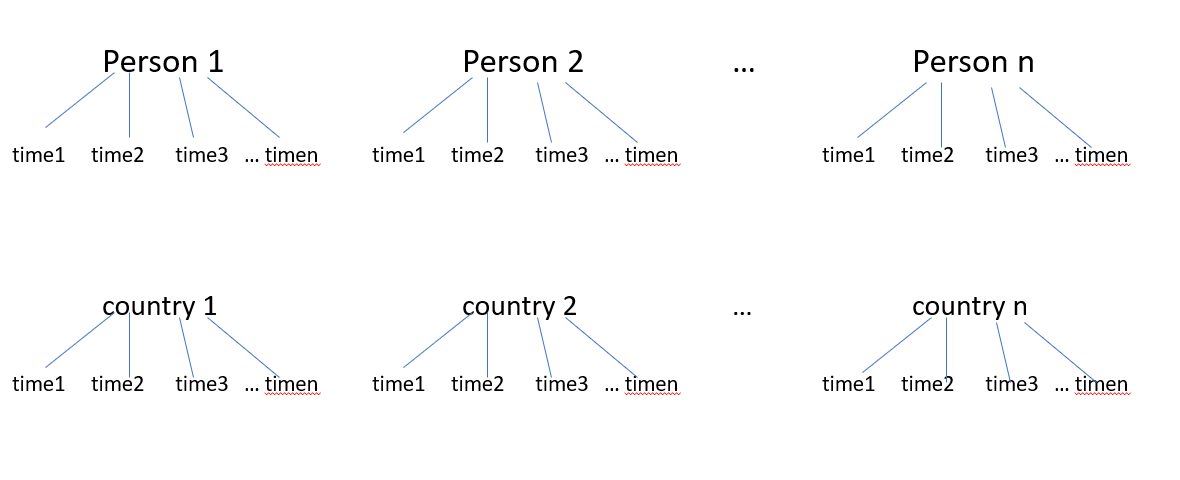

All the data and analyses we have done so far have been <i>cross-sectional.</i> Meaning they focus on a single-time period. If your data is panel meaning has data of observations over time, then you have to use panel analysis to estimate the model because observations over time are more likely to be dependent on each other.

Panel analysis examines observations over time. For example, you can examine country's CO2 emissions over time or individual's BMI indexes over time. One of the advantages of panel analysis, is that it is a stronger causal argument. Within sociological panel analysese the following two models are most frequently used:
* Random effects model
* Between effects model
* Fixed effects model

This is an example of panel data.

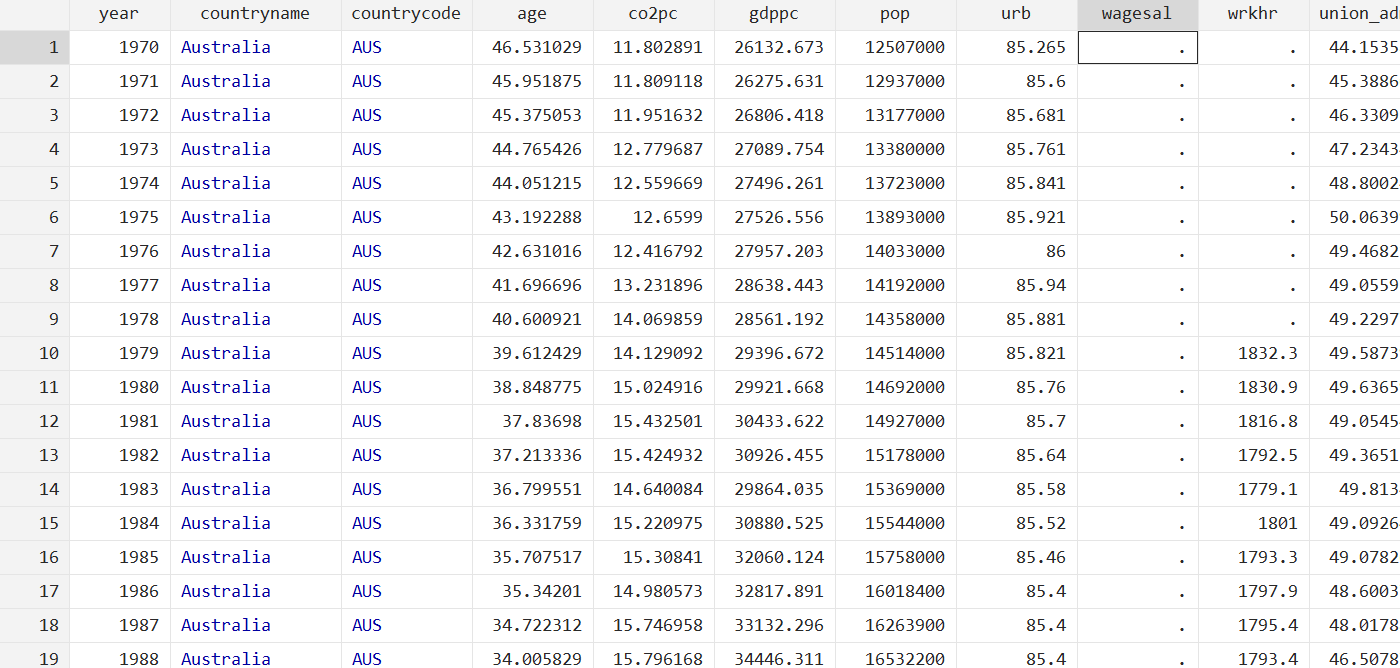

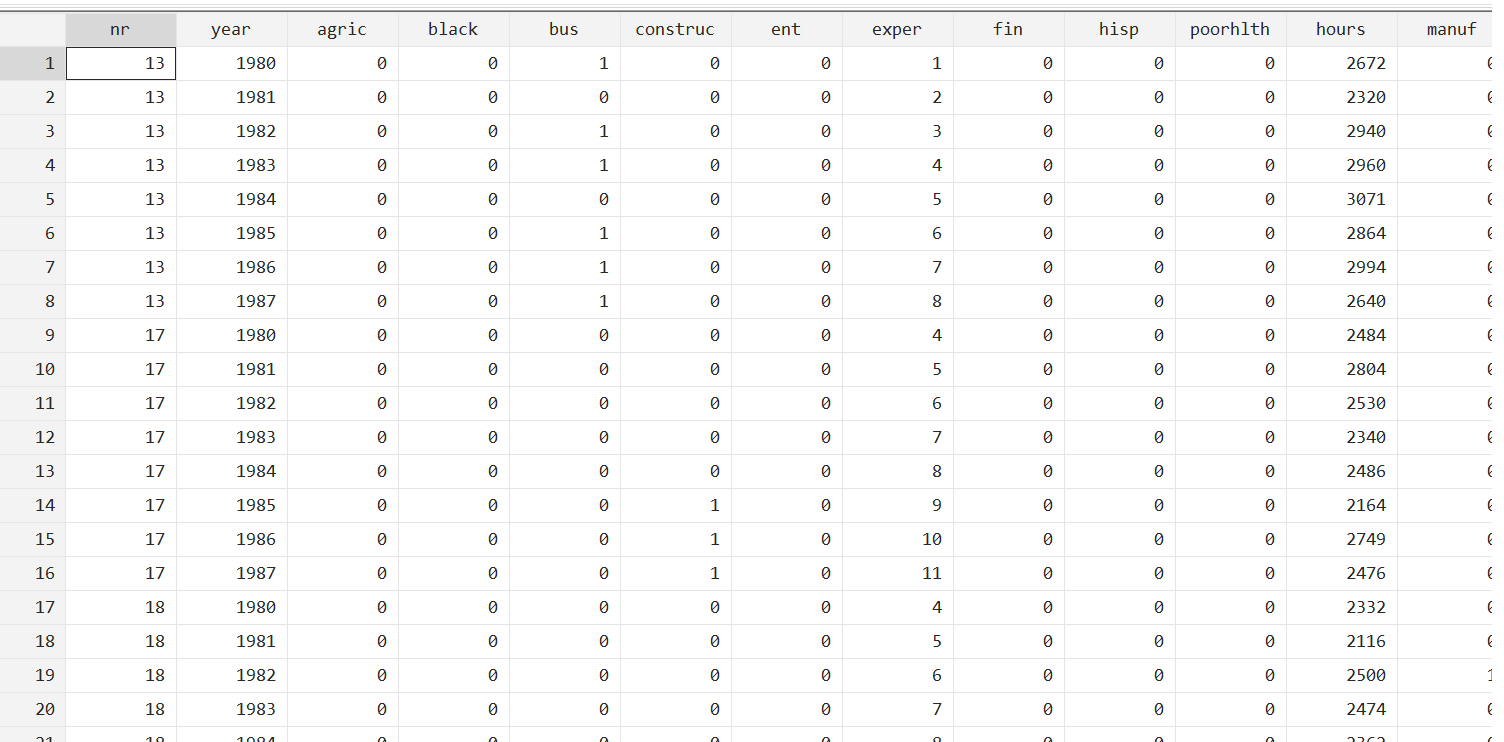

Within panel data, we have two types variables:
* temporal variables which are variables that change over time.
* non-temporal variables which are variables that DON'T change over time.

### Random effects model
The random effects model (also sometimes referred to as a random intercept model) for panel data where there are i clusters with t time points. The random effects model controls for time-dependence (t) by giving every i cluster it's own intercept. The random effects model examines all i and t observations in the panel data while controling for i clusters.

So for example, we can derive the random effects model by doing the following. First we have the panel represented as a traditional regression model:

<center>$y_{ti}=\beta_0+\beta_1*x_{1ti}+...+\beta_p*x_{pti}+\xi_{pti}$
    
where $y_{ti}$ is the outcome at t time and i panel-observation

$\beta_0$ is intercept

$\beta_1 ... \beta_p$ is the coefficient for $x_{2ti} ... x_{pti}$
    
$x_{1ti} ... x_{pti}$ are the covariates/independent variables
    
$\xi_{pti}$ is the residual error term (this greek letter is pronouced like "sky" but with a z)

<b>But we need to do some sort of controlling here for the i clusters

Given that t times are clustered with i, we can substitute: $\xi_{ti}=\zeta_i + \epsilon_{ti}$

where $\zeta_i$ is difference between the overall population mean and i-cluster specific mean 

$\epsilon_{ti}$ is the residual error term for all observations

Now, substituting to the previous equation does...

<center>$y_{ti}=\beta_0+\beta_1*x_{1ti}+...+\beta_p*x_{pti}+(\zeta_i + \epsilon_{ti})$

<center>$y_{ti}=(\beta_0+\zeta_i)+\beta_1*x_{1ti}+...+\beta_p*x_{pti}+ \epsilon_{ti}$
    
where $(\beta_0+\zeta_i)$ is the i cluster-specific intercept

## Let's practice running these various models in Stata

### Reshaping the data
Before estimating panel results, data must be in long format. The data we are working with right now, is currently in wide format, meaning there are multiple variables representing the each time period for the variables.

In [3]:
*load the data
use "https://www.stata-press.com/data/mlmus4/pefr.dta", clear
desc
*This is how wide data looks like
list if id<6




Contains data from https://www.stata-press.com/data/mlmus4/pefr.dta
 Observations:            17                  
    Variables:             5                  26 Nov 2004 15:45
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
wp1             float   %9.0g                 
wp2             float   %9.0g                 
wm1             float   %9.0g                 
wm2             float   %9.0g                 
--------------------------------------------------------------------------------
Sorted by: 


     +----------------------------+
     | id   wp1   wp2   wm1   wm2 |
     |----------------------------|
  1. |  1   494   490   512   525 |
  2. |  2   395   397   430   415 |
  3. |  3   516   512   520   508 |
  4. |  

In [4]:
*You can reshape the data in Stata
reshape long wp wm, i(id) j(time)

(j = 1 2)

Data                               Wide   ->   Long
-----------------------------------------------------------------------------
Number of observations               17   ->   34          
Number of variables                   5   ->   4           
j variable (2 values)                     ->   time
xij variables:
                                wp1 wp2   ->   wp
                                wm1 wm2   ->   wm
-----------------------------------------------------------------------------


In [28]:
list if id<6


     +-----------------------+
     | id   time    wp    wm |
     |-----------------------|
  1. |  1      1   494   512 |
  2. |  1      2   490   525 |
  3. |  2      1   395   430 |
  4. |  2      2   397   415 |
  5. |  3      1   516   520 |
     |-----------------------|
  6. |  3      2   512   508 |
  7. |  4      1   434   428 |
  8. |  4      2   401   444 |
  9. |  5      1   476   500 |
 10. |  5      2   470   500 |
     +-----------------------+


Notice the the difference. Data must be in long format in order to run panel analysis.

The previous example was just for us to practice reshaping data. 

Now, we will open data that is already in long format. This is a dataset is mothers giving birth beween 1990 to 1998. This is subset from Abrevaya 2006 data published in the Journal of Applied Econometrics Data Archive. Here are main variables:

* momid: mother identifier
* birwt: birthweight (in grams)
* smoke: dummy variable for mother smoking during pregnancy
* male: dummy variable for sex of baby
* mage: mother's age at birth (in yrs)
* hsgrad: dummy variable of mom's grad HS
* somecoll: dummy variable of mom's having some college or more
* collgrad: dummy variable of mom's graduate college
* (omitted): reference catgory where mom's did not graduate HS
* married: dummy variable of married
* black: dummy variable for racial identity Black person
* kessner2: Kessner index=2 is of adequate prenatal care
* kessner3: Kessner index=3 is of adequate prenatal care
* omitted: Kessner index=1 is of adequate prenatal care (ref category)
* novisit: dummy variable no prenatal care visit
* pretri2: dummy variable fo first prenatal care visit in 2nd trimester
* pretri3: dummy variable fo first prenatal care visit in 3rd trimester
* omitted: ref cat of first prenatal care visit in 1st trimester

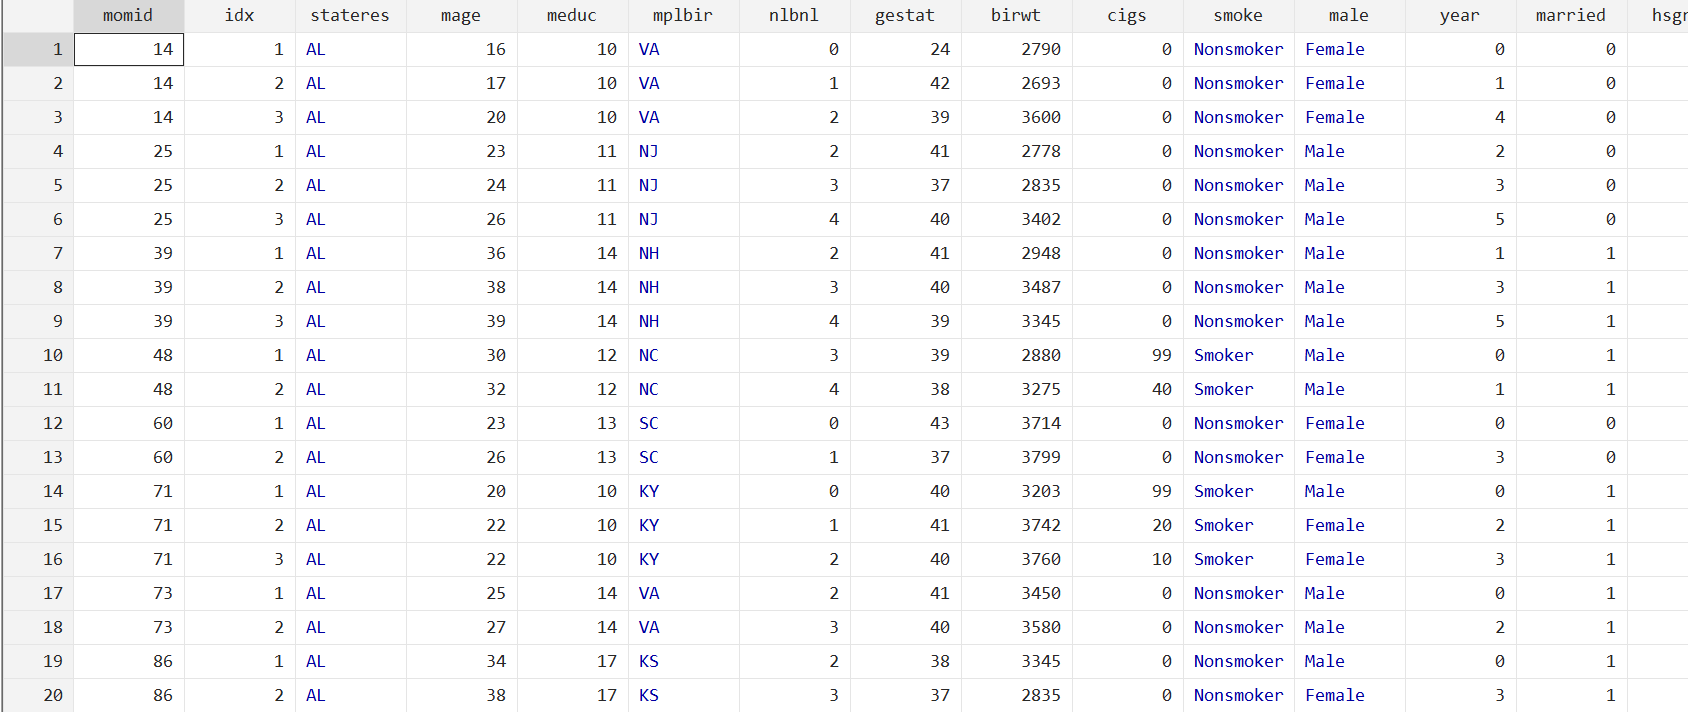

In [2]:
*Let's run the data 
use "https://www.stata-press.com/data/mlmus4/smoking.dta",clear
desc




Contains data from https://www.stata-press.com/data/mlmus4/smoking.dta
  obs:         8,604                          
 vars:            24                          21 Jul 2007 11:49
 size:       825,984                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
momid           float   %9.0g                 
idx             float   %9.0g                 
stateres        float   %9.0g      state      
mage            float   %9.0g                 
meduc           float   %9.0g                 
mplbir          float   %9.0g      state      
nlbnl           float   %9.0g                 
gestat          float   %9.0g                 
birwt           float   %9.0g                 
cigs            float   %9.0g                 
smoke           float   %9.0g     

In [3]:
list in 1/3


     +-------------------------------------------------------------------------+
  1. | momid | idx | stateres | mage | meduc | mplbir | nlbnl | gestat | birwt |
     |    14 |   1 |       AL |   16 |    10 |     VA |     0 |     24 |  2790 |
     |-------+-----------------------------------------------------------------|
     | cigs  |     smoke  |   male  | year  | married  |  hsgrad  |  somecoll  |
     |    0  | Nonsmoker  | Female  |    0  |       0  |       0  |         0  |
     |-------------------------------------------------------------------------|
     | collgrad | magesq | black | kessner2  | kessner3  | novisit  | pretri2  |
     |        0 |    256 | Black |        0  |        1  |       0  |       0  |
     |-------------------------------------------------------------------------|
     |                                 pretri3                                 |
     |                                       1                                 |
     +---------------------

In [21]:
*I want to make a educational attainment variable
gen education=hsgrad*1+somecoll*2+collgrad*3
label define ed 0 "No HS Degree" 1 "HS Degree" 2 "Some Coll" 3 "College"
label values education ed

In [24]:
tab ed


   education |      Freq.     Percent        Cum.
-------------+-----------------------------------
No HS Degree |        994       11.55       11.55
   HS Degree |      2,466       28.66       40.21
   Some Coll |      2,029       23.58       63.80
     College |      3,115       36.20      100.00
-------------+-----------------------------------
       Total |      8,604      100.00


### XTSET: you must tell Stata, the data is panel using the xtset command.

In [22]:
*use the i cluster
xtset momid

       panel variable:  momid (unbalanced)


<i>Balanced panel data means no data is missing among the years. Unbalanced data means there are some missing years.

In [23]:
*Stata has many specific panel commands "xt"
*xtsum reports summary statistics overall, between, and within the data.
xtsum birwt smoke black year


Variable         |      Mean   Std. Dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
birwt    overall |  3469.931   527.1394        284       5642 |     N =    8604
         between |             451.1943       1361     5183.5 |     n =    3978
         within  |             276.7966   1528.431   5411.431 | T-bar =  2.1629
                 |                                            |
smoke    overall |  .1399349   .3469397          0          1 |     N =    8604
         between |             .3216459          0          1 |     n =    3978
         within  |             .1368006  -.5267318   .8066016 | T-bar =  2.1629
                 |                                            |
black    overall |  .0717108   .2580235          0          1 |     N =    8604
         between |              .257512          0          1 |     n =    3978
         within  |                    0   .0717108   .0717108 | T-bar =

Here, there are 3978 mothers observed over 8 years. Since the data is unbalanced that means that some mothers have missing years.

## Estimating models
Once the data is in long format and the data has been declared a panel data in Stata, we can now estimate models.

### Random effects model
In Stata, you can use the xtreg command to estimate random effects model.

In [25]:
*mle stands for maximum likelihood estimation and vce is to use robust standard errors
xtreg birwt i.smoke i.male c.mage i.edu i.married i.black ///
    i.kessner2 i.kessner3 i.novisit i.pretri2 i.pretri3, mle


Fitting constant-only model:
Iteration 0:   log likelihood = -65475.527
Iteration 1:   log likelihood = -65475.486

Fitting full model:
Iteration 0:   log likelihood = -65149.757
Iteration 1:   log likelihood = -65145.754
Iteration 2:   log likelihood = -65145.752

Random-effects ML regression                    Number of obs     =      8,604
Group variable: momid                           Number of groups  =      3,978

Random effects u_i ~ Gaussian                   Obs per group:
                                                              min =          2
                                                              avg =        2.2
                                                              max =          3

                                                LR chi2(13)       =     659.47
Log likelihood  = -65145.752                    Prob > chi2       =     0.0000

------------------------------------------------------------------------------
       birwt |      Coef.   Std. Er

### my answer below
Since we did a random effects model, our results are generalized to the whole sample. They are estimates of population mean birthweight. Mothers are being compared to all other mothers and times. The results report a negative significant relationship between birthweight and smoker status. Meaning mother who smoked during preganacy have lower birthweight of their newborn as compared to mothers who did not smoke. Another way to say this is the population mean birthweight for mothers who smoked is 218 grams lower than mothers who did not smoke, all else equal. 

Women scoring within the "kessner2" have significantly lower birthweight as compared to mother in the "kessner1" (ref category). Moreover, women scoring in the "kessner3 have significantly lower birthweight as compared to mothers in "kessner1." Since kessner3 < kessner2 and both variables are being compared to kessner1, we can make the following more general statement: Mothers who score higher on kessner index have significantly lower birthweight of their newborns. Moreover, mothers who do not have a prenatal visit have lower birthweight as compared to mothers who had their first prenatal visit in their first trimester, but the value is not significant.

Mothers giving birth to male children are significantly higher birthweight as compared to female babies. As a mothers age increases there is a significant increase in birthweight of child. Another way to report this is by saying: for every one year increase in a mother's age, there is a corresponding 8.10 increase in birthweight grams, all else equal (or holding all other variables constant). As a mother's educational attainment increases, there is a corresponding significant increase in birthweight grams. Mothers who are married have higher birthweight of their newborn as compared to non-married mothers (the resuts are slightly significant p=.061). Black mothers report significantly lower birthweight in their new borns as compared to white mothers. 

/sigma_u is the standard deviation of the random intercept. /sigma_e is the standard deviation of all the observations residuals. The sample here is 8,604. 

Let's make a graph of birthweight across smokers and educational attainment.

In [40]:
margins smoke, at(education=(0(1)3)) atmeans


Adjusted predictions                            Number of obs     =      8,604
Model VCE    : OIM

Expression   : Linear prediction, predict()

1._at        : 0.smoke         =    .8600651 (mean)
               1.smoke         =    .1399349 (mean)
               0.male          =    .4918642 (mean)
               1.male          =    .5081358 (mean)
               mage            =    28.59182 (mean)
               education       =           0
               0.married       =    .1133194 (mean)
               1.married       =    .8866806 (mean)
               0.black         =    .9282892 (mean)
               1.black         =    .0717108 (mean)
               0.kessner2      =    .8183403 (mean)
               1.kessner2      =    .1816597 (mean)
               0.kessner3      =    .9514179 (mean)
               1.kessner3      =    .0485821 (mean)
               0.novisit       =    .9909344 (mean)
               1.novisit       =    .0090656 (mean)
               0.pretri2      


  Variables that uniquely identify margins: education smoke


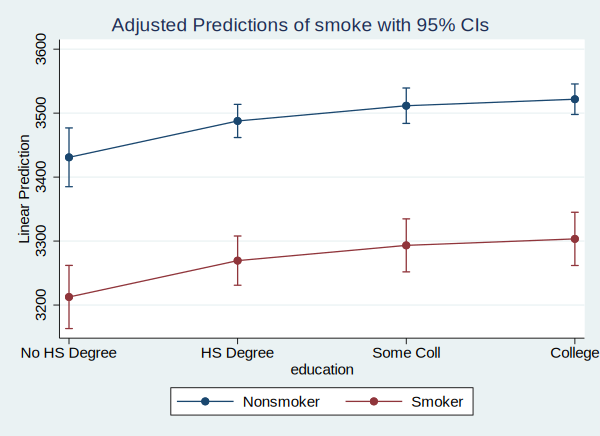

In [41]:
marginsplot

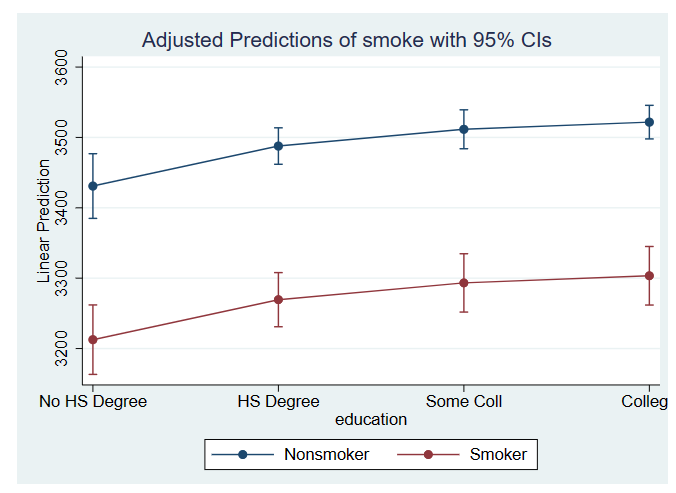

Here, we see mothers who smoke during pregnancy have lower bithweight across all educational attainments as compared to mother who did not smoke during pregnancy.

## Practice
* Q1: Load the eviction_classdata.dta" from Canvas. This is data 2012-2018 of eviction and demographic data at the county level.

    * fips - fips code is a five-digit code where state is the first two digits and the last three digits are county code
    * county - county name
    * state - state name
    * year - year 2012-2018
    * type - eviction data was either observed or modeled
    * filings - number of filings observed in proprietary data
    * filing_rate - number of filings per 100 renting households
    * threatened - number of households threatened with eviction observed in proprietary data
    * threatened_rate - number of households threatened per 100 renting households
    * judgements - number of judgements observed in proprietary data
    * judgement_rate - number of judgements per 100 renting households
    * medhhinc - median household income
    * wht_per - % of white, not Latinx residents
    * blk_per - % of Black, not Latinx residents
    * lat_per - % of Latinx residents
    * metro - metro (1-metro; 0-non-metro)

* Q2: Is this cross-sectional or panel data? Why? What is the unit of analysis?
* Q3: What are the possibilities for the time (t)? What is i represent?
* Q4: Let Stata know that this is a panel data clustered at i. Then, estimate the random effects model with filing rate as the dependent variable with Stata. Use percent of white people, median household income, and metro as independent variables. Describe the findings. 
* Q5: Calculate the predictive values of eviction for either % of white residents OR median household income FOR METRO counties. Then, graph it.

### Between effects model
The between effects model is a random-intercept model of the average of the dependent and independent variables of the model. The between-effects model observes only the between-j effects of the independent variables.

<center>$y_{.i}=\beta_0+\beta_1*\bar{x}_{1.i}+...+\beta_p*\bar{x}_{p.i}+\zeta_i + \bar{\epsilon}_{.i}$
    
where $y_{.i}$ is the mean outcome of i cluster

$\bar{x}_{1.i} ... \bar{x}_{p.i}$ is the average of the independent variables or covariates for i-cluster

$\zeta_i + \bar{\epsilon}_{.i}$ has the population mean $E(\zeta_t+\bar{\epsilon}_{.i})=0$ and has heteroskedastic variance $Var(\zeta_t+\bar{\epsilon}_{.i})=\psi+\theta/n_j$
    
<b>The between effects model doesn't have ANY within effects in the model. Any non-temporal variables are part of the intercept.

### Between effects model
In Stata, you can use the xtreg command with "be" to estimate between effects model.

In [42]:
xtreg birwt i.smoke male mage i.education married black ///
    kessner2 kessner3 novisit pretri2 pretri3, be


Between regression (regression on group means)  Number of obs     =      8,604
Group variable: momid                           Number of groups  =      3,978

R-sq:                                           Obs per group:
     within  = 0.0299                                         min =          2
     between = 0.1168                                         avg =        2.2
     overall = 0.0949                                         max =          3

                                                F(13,3964)        =      40.31
sd(u_i + avg(e_i.))=  424.7306                  Prob > F          =     0.0000

------------------------------------------------------------------------------
       birwt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       smoke |
     Smoker  |  -286.1476   23.22554   -12.32   0.000    -331.6828   -240.6125
        male |   104.9432   19.49531     5.38   0

### my answer below
Remember these results only report the population mean BETWEEN mothers only. When comparing between-mother effects, mothers who smoked during pregnancy have 286 grams significantly lower birthweight as compared to mother who did not smoke. Mothers with male new borns have 105 grams higher as compared to female new borns (a significant difference). Between mothers, we find that for every one year increase in mother's age there is a 4 grams significantly higher in birthweight of newborn. The table above reports that between mothers, as mothers educational attainment increases there is a corresponding significant increase in birthweight. The estimated coefficient between mothers for married mothers is 42 grams higher as compared for non-married mothers (p=.108). Between mothers, Black mothers have 218 grams significantly lower as compared to white mothers. As the kessner index increases for mothers, there is a corresponding significantly decrease in birthweight. Between mothers, mothers who did not have a prenatal visit have 51 grams lower in birthweight as compared to mothers who had their first prenatal visit in their first trimester.

Important notes, the sample of the between-effects model is 3,978.

## Between effects model Practice
* Q1: Re-load the eviction_classdata.dta" from Canvas. This is data 2012-2018 of eviction and demographic data at the county level.

    * fips - fips code is a five-digit code where state is the first two digits and the last three digits are county code
    * county -county name
    * state - state name
    * year - year 2012-2018
    * type - eviction data was either observed or modeled
    * filings - number of filings observed in proprietary data
    * filing_rate - number of filings per 100 renting households
    * threatened - number of households threatened with eviction observed in proprietary data
    * threatened_rate - number of households threatened per 100 renting households
    * judgements - number of judgements observed in proprietary data
    * judgement_rate - number of judgements per 100 renting households
    * medhhinc - median household income
    * wht_per - % of white, not Latinx residents
    * blk_per - % of Black, not Latinx residents
    * lat_per - % of Latinx residents
    * metro - metro (1-metro; 0-non-metro)

* Q2: Let Stata know that this is a panel data clustered at i. Then, estimate the between effects model with filing rate as the dependent variable with Stata. Use percent of white people, median household income, and metro as independent variables.

### Fixed effects model
The fixed effects model (sometimes referred to as "within-effects" model) examines only the effects within each i cluster. You derive the fixed effects model by taking the random effects model and subtracting the between effects model:

<center>$y_{ti}-y_{.i}=\beta_1+\beta_2*(x_{2ti}-\bar{x}_{2.i})+...+\beta_p*(x_{pti}-\bar{x}_{p.i})+\zeta_i+(\epsilon_{ti}-\bar{\epsilon}_{.i})$
    
Then, substitute the random intercept for i-specific clusters ($\beta_1+\zeta_i$) with a fixed intercept $\alpha_i$. We do this by using dummies for each i cluster:
    
<center>$y_{ti}=\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\sum \limits _{k=1} ^{i}d_{ki}\alpha_k+\epsilon_{ti}$
    
<center>$y_{ti}=\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\alpha_i+\epsilon_{ti}$
    
<b>The fixed effects model centers all independent variables around its own i-cluster mean. $\epsilon_{ti}-\bar{\epsilon}_{.i}$ has the population mean $E(\epsilon_{ti}-\bar{\epsilon}_{.i})=0$ and is heteroskedastic with variance $Var(\epsilon_{ti}-\bar{\epsilon}_{.i})=\theta(1-1/n_j)$.
    
Non-temporal covariates are dropped from the model. 

### Fixed effects model
In Stata, you can use the xtreg command with "fe" to estimate fixed effects model.

In [43]:
xtreg birwt i.smoke male mage ///
    kessner2 kessner3 novisit pretri2 pretri3, fe vce(robust)


Fixed-effects (within) regression               Number of obs     =      8,604
Group variable: momid                           Number of groups  =      3,978

R-sq:                                           Obs per group:
     within  = 0.0465                                         min =          2
     between = 0.0557                                         avg =        2.2
     overall = 0.0546                                         max =          3

                                                F(8,3977)         =      26.78
corr(u_i, Xb)  = -0.0733                        Prob > F          =     0.0000

                              (Std. Err. adjusted for 3,978 clusters in momid)
------------------------------------------------------------------------------
             |               Robust
       birwt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       smoke |
     Smoker  

### my answer
The Fixed effects model reports only within-mother effects. That means only mothers are compared within themselves over time. Mothers are their own control. Because of this, you DO NOT include non-temporal variables (like educational attainment, married, or black variables). The table above finds that within-mothers, mothers who smoke during pregnancy report 105 grams significant lower birthweight. Male babies report 126 grams significantly higher birthweight as compared to female babies. As the kessner index increases there is significant corresponding decrease in grams in birthweight. The within-effect difference of mothers who do not do a pre-natal visit is 5 grams lower as compared to mothers who had their first pre-natal visit in their first trimester. Mothers who have their first pre-natal visit in their second trimester have 81 grams significant higher grams in birthweight as compare to mothers who had their first pre-natal visit in their first trimester. Mothers who have their first pre-natal visit in their third trimester have 153 grams significant higher grams in birthweight as compare to mothers who had their first pre-natal visit in their first trimester.

<b> Note, you cannot general fixed effects to the general population, it is cluster specific. </b>

### Let's compare the estimates across models:

| model type | Random effects | Between effects | Within effects (fixed effects)|
| --- | --- | --- | --- |
| paramters | est (SE) | est (SE) | est (SE) |
| intercept | 3,117 (43) | 3,241 (46) | n/a |
| smoke | -218 (19) | -286 (23) | -105 (32) | 
| male | 121 (10) | 105 (19) | 126 (11) |
| mage | 8 (1) | 4 (2) | 23 (3) | 
| hsgrad | 57 (26) | 59 (26) | n/a |
| somecoll | 81 (28) | 85 (28) | n/a |
| collgrad | 91 (29) | 100 (29) | n/a | 
| married | 50 (27) | 42 (26) | n/a |
| black | -211 (29) | -218 (29) | n/a |
| kessner2 | -93 (22) | -101 (38) | -91 (26) |
| kessner3 | -151 (41) | -202 (79) | -128 (49) | 
| novisit | -30 (81) | -51 (124) | -5 (91) | 
| pretri2 | 93 (25) | 125 (45) | 81 (29) |
| pretri3 | 179 (53) | 241 (101) | 153 (62) |

Because random effects uses both between-effects and within-effects. Random effect coefficients are between the estimates of between-effects and within-effects.

You should always make your decision of what model to use based on theory and previous research. But there is a Hausman test that can statistically assess which model is best for your data.

## Fixed effects model Practice
* Q1: Re-load the eviction_classdata.dta" from Catcourses. This is data 2012-2018 of eviction and demographic data at the county level.

* fips - fips code is a five-digit code where state is the first two digits and the last three digits are county code
* county -county name
* state - state name
* year - year 2012-2018
* type - eviction data was either observed or modeled
* filings - number of filings observed in proprietary data
* filing_rate - number of filings per 100 renting households
* threatened - number of households threatened with eviction observed in proprietary data
* threatened_rate - number of households threatened per 100 renting households
* judgements - number of judgements observed in proprietary data
* judgement_rate - number of judgements per 100 renting households
* medhhinc - median household income
* wht_per - % of white, not Latinx residents
* blk_per - % of Black, not Latinx residents
* lat_per - % of Latinx residents
* metro - metro (1-metro; 0-non-metro)

* Q2: Let Stata know that this is a panel data clustered at i. Then, estimate the fixed effects model with filing rate as the dependent variable with Stata. Use percent of white people, median household income, and metro as independent variables.
* Q3: Make a table comparing the random-, between-, and fixed- effects models. What does it tell us?